# Estrategia comparando activos con indicador macroeconómico

## Autor: Lucía Saiz Lapique

__Examen__

__Gestión de Activos y Carteras__

__CUNEF__

En el caso de esta estrategia, el objetivo es buscar las relaciones entre cada activo y el
indicador macroeconómico seleccionado. Para ello, en primer lugar, seleccionamos los
precios de cada activo por separado y los del indicador macroeconómico.

Seleccionamos los mismos activos que se han estudiado en las otras estrategias: DOW JONES, Japanese Bond y Oro. Además, el índice macroeconómico seleccionado es el Citi Surprise Index de Emerging Markets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
datos = pd.read_excel('datos_examen.xlsx', sheet_name = 'Precios')
datos = datos.set_index('Date')
observacion = datos.index >= dt.datetime(2014, 4, 26)
datos = datos[(observacion)]
datos

,DOW JONES,Japanese Bond,DKK-EUR X-RATE,CAD-USD X-RATE,DKK DEPOSIT,CAD DEPOSIT,Oro,EUR_USD
Date,,,,,,,,
2014-04-28,16448.74,144.97,0.1340,0.9067,0.480,1.425,1296.74,1.3851
2014-04-29,16535.37,144.97,0.1340,0.9137,0.480,1.435,1295.92,1.3812
2014-04-30,16580.84,144.92,0.1340,0.9123,0.480,1.455,1291.60,1.3867
2014-05-01,16558.87,144.97,0.1340,0.9124,0.480,1.455,1284.31,1.3870
2014-05-02,16512.89,145.09,0.1340,0.9112,0.420,1.445,1299.70,1.3869
...,...,...,...,...,...,...,...,...
2020-04-27,24133.78,152.82,0.1341,0.7125,-0.635,0.770,1713.99,1.0829
2020-04-28,24101.55,152.84,0.1341,0.7144,-0.135,0.785,1707.79,1.0820
2020-04-29,24633.86,152.84,0.1341,0.7205,-0.635,0.780,1713.41,1.0873


In [3]:
indicador = pd.read_excel('datos_examen.xlsx', sheet_name = 'Indicador')
indicador = indicador.set_index('Date')
indicador

,Citi Economic Surprise Index - EM
Date,
2005-04-11,16.5
2005-04-12,9.4
2005-04-13,9.1
2005-04-14,3.0
2005-04-15,1.2
...,...
2020-04-27,4.4
2020-04-28,5.1
2020-04-29,12.1


In [4]:
datos = pd.concat([datos, indicador], axis = 1)
datos = datos.dropna()
len(datos)

1515

In [5]:
datos_ind = datos[['DOW JONES', 'Japanese Bond', 'Oro', 'EUR_USD']]
datos_ind = datos_ind.iloc[:,:-1].div(datos_ind.EUR_USD, axis=0)
datos_ind['Indicador'] = datos['Citi Economic Surprise Index - EM']
datos_ind.head()

,DOW JONES,Japanese Bond,Oro,Indicador
Date,,,,
2014-04-28,11875.489134,104.663923,936.206772,-26.1
2014-04-29,11971.741964,104.959456,938.256588,-26.3
2014-04-30,11957.049109,104.507103,931.419918,-27.0
2014-05-01,11938.622927,104.520548,925.962509,-25.3
2014-05-02,11906.330666,104.614608,937.125964,-26.6


In [6]:
rentab = datos_ind.pct_change().dropna()

In [7]:
dow = pd.DataFrame(datos['DOW JONES'])
dow['Indicador'] = datos['Citi Economic Surprise Index - EM']

Buscamos la correlación a 12 meses entre la rentabilidad del activo y el indicador.

In [8]:
dow['Correlación'] = dow['DOW JONES'].rolling(window = 256).corr(dow['Indicador'])

In [9]:
dow = dow.dropna()
dow

,DOW JONES,Indicador,Correlación
Date,,,
2015-05-01,18024.06,-16.0,0.459919
2015-05-04,18070.40,-18.2,0.446817
2015-05-05,17928.20,-18.1,0.435739
2015-05-06,17841.98,-18.0,0.425617
2015-05-07,17924.06,-13.9,0.417461
...,...,...,...
2020-04-27,24133.78,4.4,0.281887
2020-04-28,24101.55,5.1,0.274637
2020-04-29,24633.86,12.1,0.266835


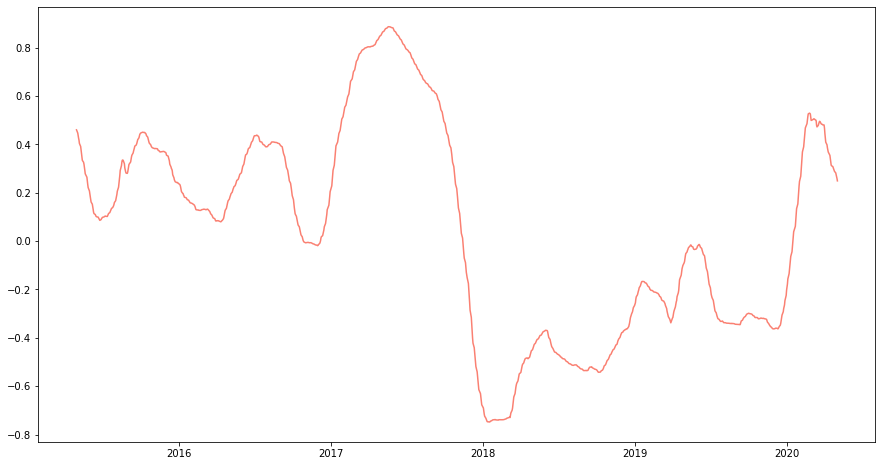

In [10]:
plt.figure(figsize = (15,8),)
plt.plot(dow.Correlación, color = 'salmon')

Para la generación de las señales, se tienen en cuenta las siguientes condiciones:
* Si la correlación es positiva y el indicador macroeconómico es positivo, la señal será 1
* Si la correlación es negativa y el indicador macroeconómico es positivo, la señal será -1
* Si la correlación es positiva y el indicador macroeconómico es negativo, la señal será -1
* Si la correlación es negativa y el indicador macroeconómico es negativo, la señal será 1

In [11]:
seña = []
for i in range(len(dow)):
    if (dow.iloc[i, 1] > 0 and dow.iloc[i, 2] > 0):
        señal = 1
        seña.append(señal)
    elif (dow.iloc[i, 1] > 0 and dow.iloc[i, 2] < 0):
        señal = -1
        seña.append(señal)
    elif (dow.iloc[i, 1] < 0 and dow.iloc[i, 2] > 0):
        señal = -1
        seña.append(señal)
    elif (dow.iloc[i, 1] < 0 and dow.iloc[i, 2] < 0):
        señal = 1
        seña.append(señal)
    else:
        señal = 0
        seña.append(señal)
dow['Señal'] = seña

In [12]:
dow

,DOW JONES,Indicador,Correlación,Señal
Date,,,,
2015-05-01,18024.06,-16.0,0.459919,-1
2015-05-04,18070.40,-18.2,0.446817,-1
2015-05-05,17928.20,-18.1,0.435739,-1
2015-05-06,17841.98,-18.0,0.425617,-1
2015-05-07,17924.06,-13.9,0.417461,-1
...,...,...,...,...
2020-04-27,24133.78,4.4,0.281887,1
2020-04-28,24101.55,5.1,0.274637,1
2020-04-29,24633.86,12.1,0.266835,1


In [13]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]
dow['Rentab_DOW'] = rentab['DOW JONES']
dow.dropna(inplace = True)

In [14]:
dow['Indicador_Renta Variable'] = 100
for i in range(1, len(dow)):    
    dow['Indicador_Renta Variable'].iloc[i] = dow['Indicador_Renta Variable'].iloc[i-1]*(1+dow['Señal'].iloc[i]*dow['Rentab_DOW'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
dow

,DOW JONES,Indicador,Correlación,Señal,Rentab_DOW,Indicador_Renta Variable
Date,,,,,,
2015-05-01,18024.06,-16.0,0.459919,-1,0.012543,100.000000
2015-05-04,18070.40,-18.2,0.446817,-1,0.007338,99.266170
2015-05-05,17928.20,-18.1,0.435739,-1,-0.011329,100.390716
2015-05-06,17841.98,-18.0,0.425617,-1,-0.019017,102.299889
2015-05-07,17924.06,-13.9,0.417461,-1,0.011733,101.099560
...,...,...,...,...,...,...
2020-04-27,24133.78,4.4,0.281887,1,0.014517,99.547129
2020-04-28,24101.55,5.1,0.274637,1,-0.000505,99.496878
2020-04-29,24633.86,12.1,0.266835,1,0.017104,101.198674


## Renta Fija

In [16]:
bono = pd.DataFrame(datos['Japanese Bond'])
bono['Indicador'] = datos['Citi Economic Surprise Index - EM']

Buscamos la correlación a 12 meses entre la rentabilidad del activo y el indicador.

In [17]:
bono['Correlación'] = bono['Japanese Bond'].rolling(window = 256).corr(bono['Indicador'])

In [18]:
bono = bono.dropna()
bono

,Japanese Bond,Indicador,Correlación
Date,,,
2015-05-01,147.50,-16.0,0.350089
2015-05-04,147.50,-18.2,0.338318
2015-05-05,147.50,-18.1,0.326264
2015-05-06,147.50,-18.0,0.313368
2015-05-07,146.77,-13.9,0.305025
...,...,...,...
2020-04-27,152.82,4.4,-0.204318
2020-04-28,152.84,5.1,-0.203531
2020-04-29,152.84,12.1,-0.203521


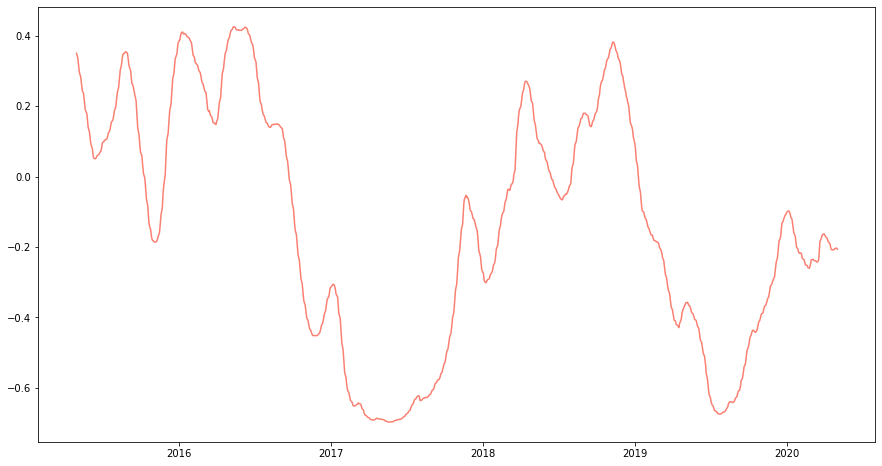

In [19]:
plt.figure(figsize = (15,8),)
plt.plot(bono.Correlación, color = 'salmon')

Para la generación de las señales, se tienen en cuenta las siguientes condiciones:
* Si la correlación es positiva y el indicador macroeconómico es positivo, la señal será 1
* Si la correlación es negativa y el indicador macroeconómico es positivo, la señal será -1
* Si la correlación es positiva y el indicador macroeconómico es negativo, la señal será -1
* Si la correlación es negativa y el indicador macroeconómico es negativo, la señal será 1

In [20]:
seña = []
for i in range(len(bono)):
    if (bono.iloc[i, 1] > 0 and bono.iloc[i, 2] > 0):
        señal = 1
        seña.append(señal)
    elif (bono.iloc[i, 1] > 0 and bono.iloc[i, 2] < 0):
        señal = -1
        seña.append(señal)
    elif (bono.iloc[i, 1] < 0 and bono.iloc[i, 2] > 0):
        señal = -1
        seña.append(señal)
    elif (bono.iloc[i, 1] < 0 and bono.iloc[i, 2] < 0):
        señal = 1
        seña.append(señal)
    else:
        señal = 0
        seña.append(señal)
bono['Señal'] = seña

In [21]:
bono

,Japanese Bond,Indicador,Correlación,Señal
Date,,,,
2015-05-01,147.50,-16.0,0.350089,-1
2015-05-04,147.50,-18.2,0.338318,-1
2015-05-05,147.50,-18.1,0.326264,-1
2015-05-06,147.50,-18.0,0.313368,-1
2015-05-07,146.77,-13.9,0.305025,-1
...,...,...,...,...
2020-04-27,152.82,4.4,-0.204318,-1
2020-04-28,152.84,5.1,-0.203531,-1
2020-04-29,152.84,12.1,-0.203521,-1


In [22]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]
bono['Rentab_bono'] = rentab['Japanese Bond']
bono.dropna(inplace = True)

In [23]:
bono['Indicador_Renta Fija'] = 100
for i in range(1, len(bono)): 
    bono['Indicador_Renta Fija'].iloc[i] = bono['Indicador_Renta Fija'].iloc[i-1]*(1+bono['Señal'].iloc[i]*bono['Rentab_bono'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
bono

,Japanese Bond,Indicador,Correlación,Señal,Rentab_bono,Indicador_Renta Fija
Date,,,,,,
2015-05-01,147.50,-16.0,0.350089,-1,-0.000411,100.000000
2015-05-04,147.50,-18.2,0.338318,-1,0.004755,99.524493
2015-05-05,147.50,-18.1,0.326264,-1,-0.003487,99.871516
2015-05-06,147.50,-18.0,0.313368,-1,-0.014277,101.297372
2015-05-07,146.77,-13.9,0.305025,-1,0.002116,101.083018
...,...,...,...,...,...,...
2020-04-27,152.82,4.4,-0.204318,-1,0.000166,117.014206
2020-04-28,152.84,5.1,-0.203531,-1,0.000963,116.901548
2020-04-29,152.84,12.1,-0.203521,-1,-0.004874,117.471380


## Materia Prima: Petróleo

In [25]:
Oro = pd.DataFrame(datos['Oro'])
Oro['Indicador'] = datos['Citi Economic Surprise Index - EM']

Buscamos la correlación a 12 meses entre la rentabilidad del activo y el indicador.

In [26]:
Oro['Correlación'] = Oro['Oro'].rolling(window = 256).corr(Oro['Indicador'])

In [27]:
Oro = Oro.dropna()
Oro

,Oro,Indicador,Correlación
Date,,,
2015-05-01,1178.46,-16.0,-0.141481
2015-05-04,1188.33,-18.2,-0.130430
2015-05-05,1193.34,-18.1,-0.119680
2015-05-06,1192.24,-18.0,-0.109027
2015-05-07,1184.51,-13.9,-0.101509
...,...,...,...
2020-04-27,1713.99,4.4,0.518820
2020-04-28,1707.79,5.1,0.536290
2020-04-29,1713.41,12.1,0.555233


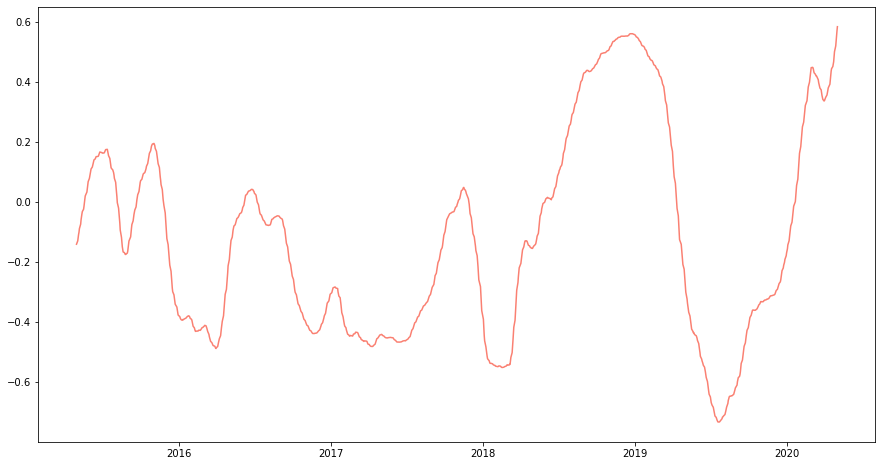

In [28]:
plt.figure(figsize = (15,8),)
plt.plot(Oro.Correlación, color = 'salmon')

Para la generación de las señales, se tienen en cuenta las siguientes condiciones:
* Si la correlación es positiva y el indicador macroeconómico es positivo, la señal será 1
* Si la correlación es negativa y el indicador macroeconómico es positivo, la señal será -1
* Si la correlación es positiva y el indicador macroeconómico es negativo, la señal será -1
* Si la correlación es negativa y el indicador macroeconómico es negativo, la señal será 1

In [29]:
seña = []
for i in range(len(Oro)):
    if (Oro.iloc[i, 1] > 0 and Oro.iloc[i, 2] > 0):
        señal = 1
        seña.append(señal)
    elif (Oro.iloc[i, 1] > 0 and Oro.iloc[i, 2] < 0):
        señal = -1
        seña.append(señal)
    elif (Oro.iloc[i, 1] < 0 and Oro.iloc[i, 2] > 0):
        señal = -1
        seña.append(señal)
    elif (Oro.iloc[i, 1] < 0 and Oro.iloc[i, 2] < 0):
        señal = 1
        seña.append(señal)
    else:
        señal = 0
        seña.append(señal)
Oro['Señal'] = seña

In [30]:
Oro

,Oro,Indicador,Correlación,Señal
Date,,,,
2015-05-01,1178.46,-16.0,-0.141481,1
2015-05-04,1188.33,-18.2,-0.130430,1
2015-05-05,1193.34,-18.1,-0.119680,1
2015-05-06,1192.24,-18.0,-0.109027,1
2015-05-07,1184.51,-13.9,-0.101509,1
...,...,...,...,...
2020-04-27,1713.99,4.4,0.518820,1
2020-04-28,1707.79,5.1,0.536290,1
2020-04-29,1713.41,12.1,0.555233,1


In [31]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]
Oro['Rentab_Oro'] = rentab['Oro']
Oro.dropna(inplace = True)

In [32]:
Oro['Indicador_Materia Prima'] = 100
for i in range(1, len(Oro)):
    Oro['Indicador_Materia Prima'].iloc[i] = Oro['Indicador_Materia Prima'].iloc[i-1]*(1+Oro['Señal'].iloc[i]*Oro['Rentab_Oro'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
Oro

,Oro,Indicador,Correlación,Señal,Rentab_Oro,Indicador_Materia Prima
Date,,,,,,
2015-05-01,1178.46,-16.0,-0.141481,1,-0.002769,100.000000
2015-05-04,1188.33,-18.2,-0.130430,1,0.013170,101.317023
2015-05-05,1193.34,-18.1,-0.119680,1,0.000714,101.389413
2015-05-06,1192.24,-18.0,-0.109027,1,-0.015186,99.849762
2015-05-07,1184.51,-13.9,-0.101509,1,0.000571,99.906751
...,...,...,...,...,...,...
2020-04-27,1713.99,4.4,0.518820,1,-0.009574,110.725443
2020-04-28,1707.79,5.1,0.536290,1,-0.002789,110.416684
2020-04-29,1713.41,12.1,0.555233,1,-0.001600,110.240051


In [34]:
Estrategia_Ind = pd.DataFrame(dow['Indicador_Renta Variable'])
Estrategia_Ind['Indicador_Materia Prima'] = Oro['Indicador_Materia Prima']
Estrategia_Ind['Indicador_Renta Fija'] = bono['Indicador_Renta Fija']
Estrategia_Ind.head()

,Indicador_Renta Variable,Indicador_Materia Prima,Indicador_Renta Fija
Date,,,
2015-05-01,100.000000,100.000000,100.000000
2015-05-04,99.266170,101.317023,99.524493
2015-05-05,100.390716,101.389413,99.871516
2015-05-06,102.299889,99.849762,101.297372
2015-05-07,101.099560,99.906751,101.083018


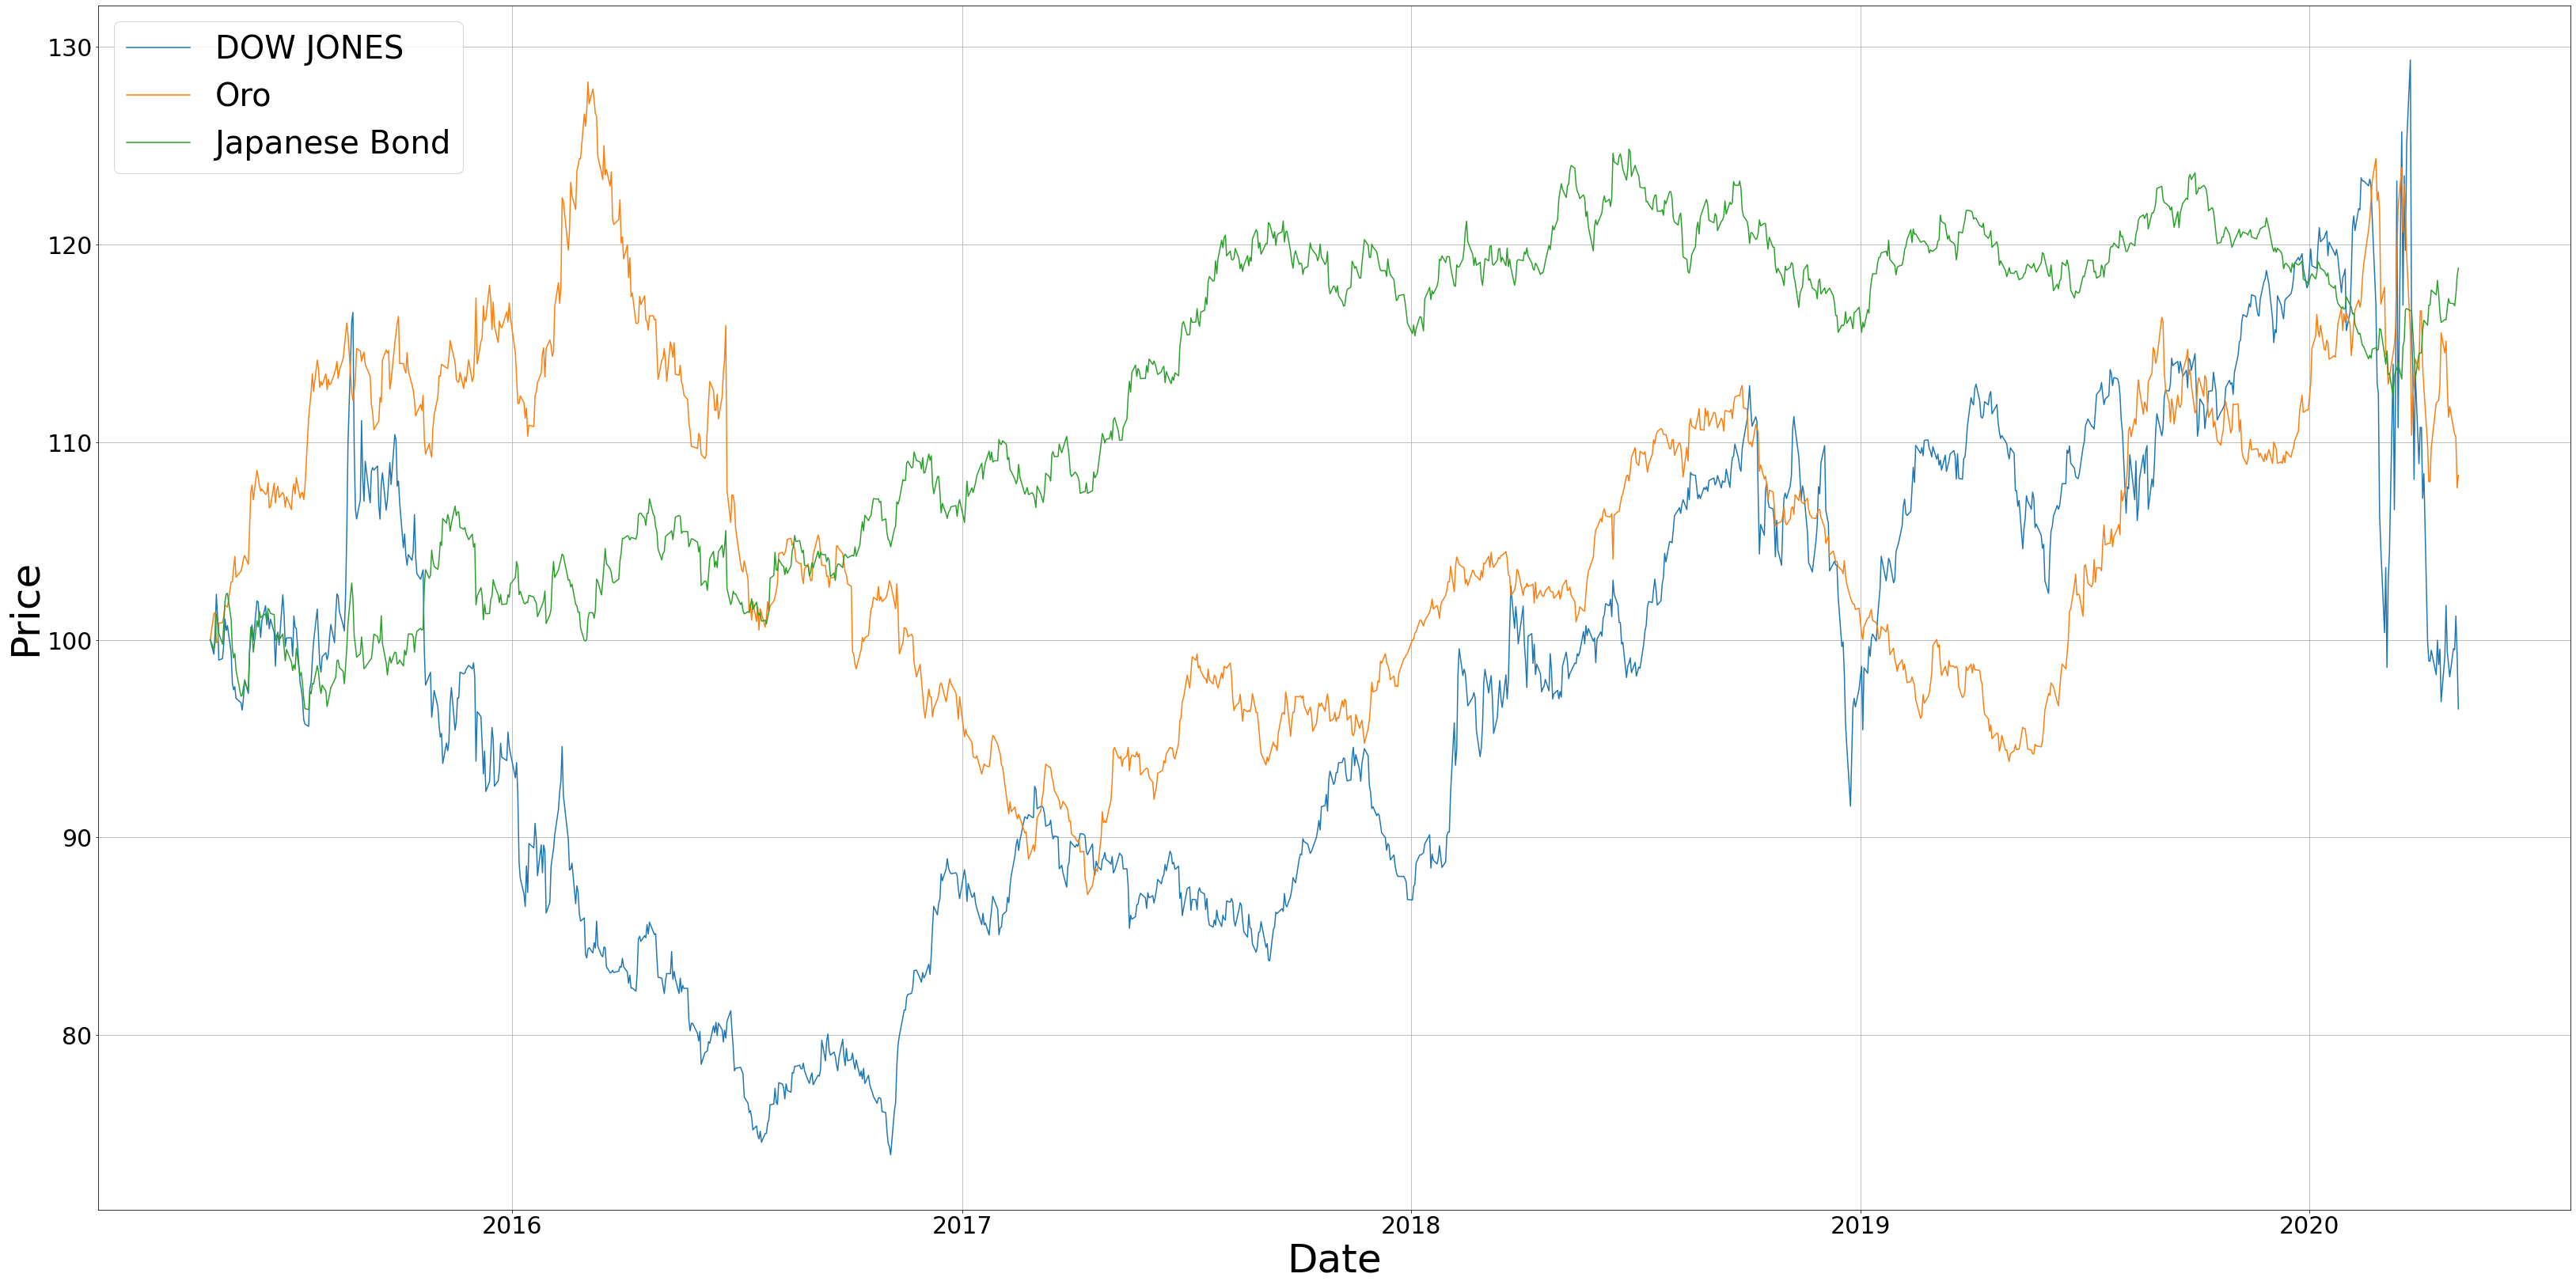

In [35]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Estrategia_Ind['Indicador_Renta Variable'])
ax1 = plt.plot(Estrategia_Ind['Indicador_Materia Prima'])
ax1 = plt.plot(Estrategia_Ind['Indicador_Renta Fija'])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(['DOW JONES', 'Oro', 'Japanese Bond'],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [36]:
Estrategia_Ind.to_csv('Estrategia_Ind')